In [12]:
#Initialisation du document
import numpy as np 
from matplotlib import pyplot as plt

Dans un premier temps on initialise les constantes nécéssaires à l'étude du système ainsi que la fonction $\Gamma$ énoncé précédemment, on rappelle:
$$\Gamma : (x,y,z) \in \mathbb{R}^3 \mapsto (\sigma(y-x), \rho x-y-xz, xy-\beta z)$$

In [13]:
sigma = 10
rho = 28
beta = 8/3

def Lorenz(t,X:np.ndarray(3)):
    Xout = np.zeros(3)
    Xout[0] = sigma*(X[1] - X[0])
    Xout[1] = rho*X[0] - X[1] - X[0]*X[2]
    Xout[2] = X[0]*X[1] - beta*X[2]
    return Xout

On implémente une fonction qui calcule une étape du shéma de Runge-Kutta d'ordre 4.

In [14]:
def RK4(tn,h,Y:np.array,f):
    k1 = f(tn,Y)
    k2 = f(tn + (h/2),Y + (h/2)*k1)
    k3 = f(tn + (h/2),Y + (h/2)*k2)
    k4 = f(tn + h, Y + h*k3)
    Yout = Y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return np.array(Yout)

On initialise les valeurs de durée temporelle d'aproximation ainsi que la duré entre deux points, ainsi que les conditions initiales:
$$T=30\\ \Delta t = 10^{-2}\\ x(t=0)= x_0 = 6\\ y(t=0)=y_0 = 4 \\ z(t=0)= z_0 =2$$

In [15]:
Total = 30
h = .01
x0,y0,z0=6,4,2

On procède maintenant a l'aproximation de la solution sur $\frac{T}{\Delta t}$ intervales. De $t=0$ à $t=T$.


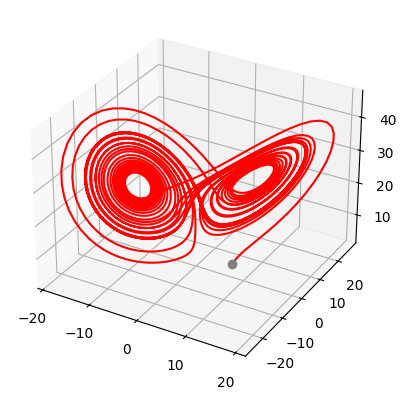

In [16]:
nbInterv = int(Total/h)
Y = np.zeros((nbInterv,3))
Y[0] = [x0,y0,z0]

for i in range(1,nbInterv):
    Yout = RK4(i*h,h,Y[i-1],Lorenz)
    Y[i] = Yout

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(Y[:,0],Y[:,1],Y[:,2], color = 'red') #Graphe de la solution aprochée
ax.plot(6,4,2,color = 'grey' , marker = 'o') #pts de départ
plt.show()

On répète la même opération avec une légère perturbation dans les conditions initiales $\epsilon = 0,1$

In [ ]:
epsilon = .1

Ye = np.zeros((nbInterv,3))
Ye[0] = Y[0] + epsilon

for i in range(1,nbInterv):
    Yeout = RK4(i*h,h,Ye[i-1],Lorenz)
    Ye[i] = Yeout